In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train_df=pd.read_csv("C:\\Users\\vidya\\Downloads\\reviews.csv")

In [4]:
train_df.head(),train_df.shape

(   listing_id        date
 0         109  2011-08-15
 1         109  2016-05-15
 2         344  2016-06-14
 3         344  2016-12-11
 4         344  2016-12-30, (1509564, 2))

In [5]:
print(type(train_df["date"][0]))  #its a string , needs to be converted into date time

<class 'str'>


In [6]:
train_df["date"]=pd.to_datetime(train_df["date"])

In [7]:
print(type(train_df["date"][0])) 

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
train_df.isna().sum()  #there are no null values

listing_id    0
date          0
dtype: int64

In [9]:
train_df.tail(10)

,listing_id,date
1509554,38487542,2019-09-10
1509555,38487542,2019-09-11
1509556,38487542,2019-09-12
1509557,38488382,2019-09-10
1509558,38488382,2019-09-11
1509559,38494976,2019-09-11
1509560,38520114,2019-09-12
1509561,38525272,2019-09-11
1509562,38531041,2019-09-13
1509563,38551243,2019-09-12


C:\Users\vidya\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


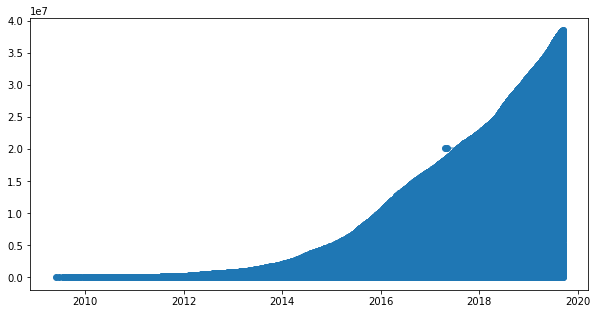

In [10]:
#incerasing trend in listing
plt.figure(figsize=(10,5))
plt.plot(train_df["date"],train_df["listing_id"],marker='o',linewidth=0.5)
plt.show()

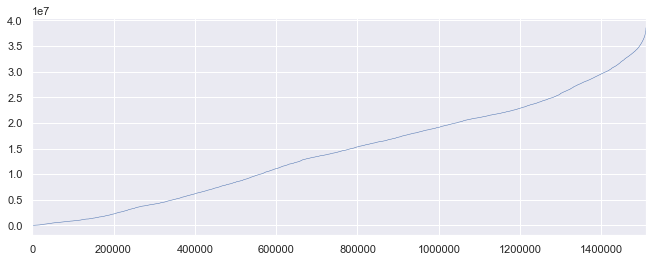

In [11]:
#better visualisation
sns.set(rc={'figure.figsize':(11, 4)})
train_df["listing_id"].plot(linewidth=0.5);

# How to Check Stationarity of a Time Series?

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

constant mean
constant variance
an autocovariance that does not depend on time.

In [12]:
train_df.set_index("date",inplace=True)
train_df.head()

,listing_id
date,
2011-08-15,109
2016-05-15,109
2016-06-14,344
2016-12-11,344
2016-12-30,344


In [13]:
#training data on 15 august 2011.
train_df["2011-08-15"]

,listing_id
date,
2011-08-15,109
2011-08-15,5728
2011-08-15,8770
2011-08-15,44511
2011-08-15,47078
2011-08-15,51922
2011-08-15,53945
2011-08-15,67089
2011-08-15,70639


In [14]:
train_df["2011-08-15"].shape

(15, 1)

In [15]:
train_df["2011-08-15"].index

DatetimeIndex(['2011-08-15', '2011-08-15', '2011-08-15', '2011-08-15',
               '2011-08-15', '2011-08-15', '2011-08-15', '2011-08-15',
               '2011-08-15', '2011-08-15', '2011-08-15', '2011-08-15',
               '2011-08-15', '2011-08-15', '2011-08-15'],
              dtype='datetime64[ns]', name='date', freq=None)

In [16]:
train_df["2011":"2019"]

,listing_id
date,
2011-08-15,109
2016-05-15,109
2016-06-14,344
2016-12-11,344
2016-12-30,344
2017-03-03,344
2018-08-28,344
2018-10-21,344
2014-06-09,2708


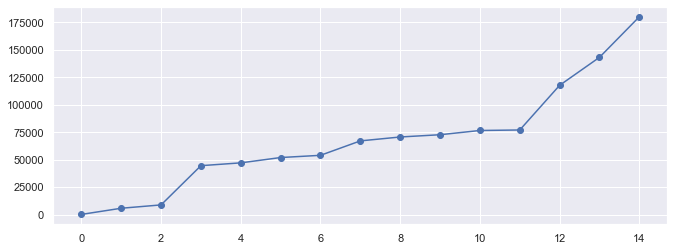

In [17]:
#plotting the data for 15 August 2011 to understand how listings were updated.
plt.plot(train_df["2011-08-15"].values,marker="o")


In [18]:
train_df["2011":"2012"].index

DatetimeIndex(['2011-08-15', '2011-06-06', '2011-08-14', '2011-09-19',
               '2012-06-19', '2012-07-22', '2012-08-13', '2012-10-08',
               '2011-01-21', '2011-02-03',
               ...
               '2012-12-28', '2012-12-11', '2012-12-18', '2012-12-11',
               '2012-12-11', '2012-12-22', '2012-12-26', '2012-12-31',
               '2012-12-24', '2012-12-28'],
              dtype='datetime64[ns]', name='date', length=7323, freq=None)

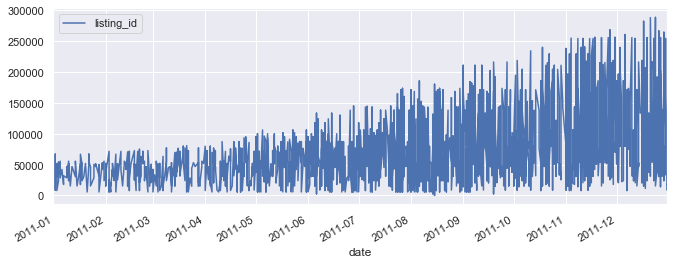

In [19]:
#lets see the trend in data for 12 months
train_df["2011-01":"2011-12"].plot()

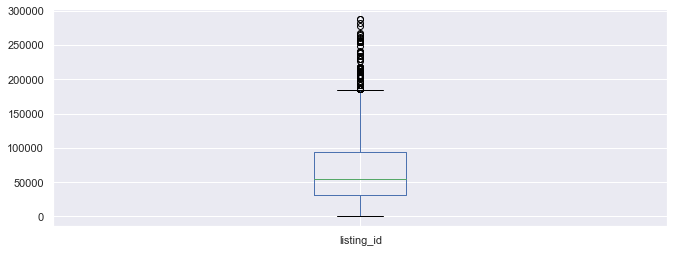

In [20]:
#making box plot to see how the values are fluctuating
train_df["2011-01":"2011-12"].boxplot()

# From the above visualisation we can see that the for 2011 the listings were having an upward trend,also its not stationary.

# Plotting Rolling Statistics:
We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.

Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.

Back to checking stationarity, we’ll be using the rolling statistics plots along with Dickey-Fuller test results a lot so I have defined a function which takes a TS as input and generated them for us. Please note that I’ve plotted standard deviation instead of variance to keep the unit similar to mean.

In [ ]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(train_df["listing_id"])

Results of Dickey-Fuller Test:
